<a href="https://colab.research.google.com/github/Alvaroguijarro97/Machile-Leaning-PS4/blob/main/ML_Problem_Set_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set #4
# Team Lab 2
Luke Smith &
Alvaro Guijarro

# Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Exercise #1

In [ ]:
# Use this data

penguins = pd.read_csv("penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

FileNotFoundError: ignored

Create a decision tree classifier with a maximum depth of 2 levels and fit the training data. Once this classifier is trained, plot the data and the decision boundary to see the benefit of increasing the depth. To plot the decision tree.

In [ ]:
# Write your code here

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)



DecisionTreeClassifier(max_depth=2)

Did we make use of the feature “Culmen Length”? Plot the tree using the function sklearn.tree.plot_tree to find out!

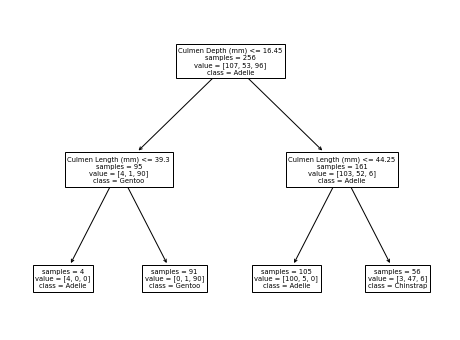

In [ ]:
# Write your code here
_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

Compute the accuracy of the decision tree on the testing data.

In [ ]:
# Write yout code here

tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97


# Exercise #2

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [ ]:
#Additional information

penguins = pd.read_csv("penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

In [ ]:
# Write your code here

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)


DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the minimum to the maximum of the training dataset. Get the predictions of each model using this dataset.

In [ ]:
# Write your code here 

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

target_predicted_linear = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)


In [ ]:
data_test

,Flipper Length (mm)
92,186.0
280,178.0
132,199.0
279,198.0
6,195.0
...,...
271,222.0
250,225.0
89,202.0
240,230.0


Create a scatter plot containing the training samples and superimpose the predictions of both models on the top.

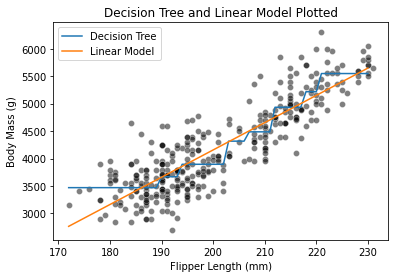

In [ ]:
# Write your code here

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_tree, label="Decision Tree")
plt.plot(data_test[feature_name], target_predicted_linear, label="Linear Model")
plt.legend()
_ = plt.title("Decision Tree and Linear Model Plotted")



Create a dataset containing values below and above the minimum and the maximum of the flipper length seen during training.

In [ ]:
#testing code
data_test_2 = pd.DataFrame(np.arange(data_train[feature_name].sample(n=50),
                                   columns=[feature_name])

SyntaxError: ignored

In [ ]:
# Write your code here

data_test_2 = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

#Create random values somehow - look this up later

Finally, make predictions with both models on this new interval of data. Repeat the plotting of the previous exercise.

In [ ]:
# Write your code here

# Exercise #3

In [ ]:
# Use this data

import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

Create a random forest containing three trees. Train the forest and check the generalization performance on the testing set in terms of mean absolute error.



In [ ]:
# Write your code here

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators = 3)
random_forest.fit(data_train, target_train)
targeted_predicted_rfc = random_forest.predict(data_test)

print('Mean Squared Error:', mean_squared_error(target_test, targeted_predicted_rfc)) 

Mean Squared Error: 337754.3604651163


We now aim to plot the predictions from the individual trees in the forest. For that purpose you have to create first a new dataset containing evenly spaced values for the flipper length over the interval between 170 mm and 230 mm.

In [ ]:
# Write your code here 

new_data = pd.DataFrame(np.arange(data_train[feature_name].min(170.0),
                                   data_train[feature_name].max(230.0)),
                                   columns=[feature_name])


ValueError: ignored

In [ ]:
new_data_test = pd.DataFrame(data = data_train[feature_name], index = range(170, 230))

new_data_test

,Flipper Length (mm)
170,NaN
171,218.0
172,215.0
173,213.0
174,215.0
175,NaN
176,215.0
177,216.0
178,215.0
179,NaN


The trees contained in the forest that you created can be accessed with the attribute estimators_. Use them to predict the body mass corresponding to the values in this newly created dataset. Similarly find the predictions of the random forest in this dataset.

In [ ]:
# Write your code here

